Probabilities
=============

Bayes' Theorem
--------------

We are _Bayesian beings_. 

$$ I = \text{information} $$
$$ P = \text{probability} $$


## Rules of Probability

Given $A$,$\bar{A}$

$$ p(\bar{A}) = 1 - p(A) $$

$p(A) \equiv p(A|I)$ is a statement which can be written
> The probability of A is defined as the probability of A _conditioned on_ I

$p(A,B|I)$ is "the probability of A _and_ B _conditioned on_ I".


### Example

Imagine I have an entire universe, it is well studied. We are interested in the location of the red "x".
<img src="https://docs.google.com/drawings/d/1bNLT4S7tTxHLuh3W61fNyL1m9BYqQAnBs3muSIA-i_A/pub?w=1036&h=710" width=70%>

#### Question 1. 
What is the probability that the x is in b?

If x can be anywhere, then the probability that _x_ is in $B$ is given by the ratio of the area of $B$ to the area of the universe.
 - $p(\,B\,|\,I\,) = \frac{1}{12}$
 
 
#### Question 2.
Are $A$ and $B$ commutative?
$$ p(B,A|I)\stackrel{?}{=} p(A,B|I) $$

Yes!
$$ p(B,A|I)= p(A,B|I) $$

#### Assertion 1.
I am going to assert that $$ p(B,A|I) = p(B|I)p(A|B,I) $$

Is this true? Why?

The probability $p(A|B,I) = 1$ because $B \subset A$. If only a fraction $f$ of $B$ were in $A$, then $p(A|B,I)\rightarrow f$, so $p(B,A|I) = f \cdot p(B|I)$.

<img src="https://docs.google.com/drawings/d/1JVktrm4VhyybTlPLs13SCEgIpacjB0Tn3v9Bn1gnz4g/pub?w=1036&h=710" width=70%>

$ p(B|I) = \frac{2}{20} $

$ p(A|B,I) = f = \frac{1}{2}$

$p(B,A,|I) = \frac{1}{20} $

We can find that $p(A,B|I)=p(A|I)p(B|A,I)$.

Combining these two things together gives us Bayes' Theorem

$$ p(A|B,I) = \frac{p(A|I) p(B|A,I)}{p(B|I)} $$

Bayes' Theorem
==============


As physicsists, we have a hypothesis, $H$. Our hyposthesis is based on data, $D$, and information, $I$ that we have. These quantities are usually denoted as vectors. 

We might have a hypothesis that Saturn is a planet with some mass. We have data on Saturn and general information that it is a planet, it is made of hydrogen and helium. 


$$ p(\vec{H}|\vec{D},I) = \frac{ p(\vec{H}|I)\ p(\vec{D}|\vec{H},I) }{ p(\vec{D}|I) } $$

$p(\vec{D}|\vec{H},I)$ is the probability we would get this data given our hypothesis and information. This is doable. Figuring out $p(\vec{H}|\vec{D},I)$ is a more difficult question, that is what everyone is looking for.


Demonstration: Coin toss
-------------
If you assert a bad hypothesis ("this is a rigged coin that will only return heads") data can completely  refute that hypothesis (i.e, flip the coin and it turns _tails_, *_Boom_*, hypothesis refuted)


Because $p(\vec{D}|I)$ doesn't affect my hypothesis, I can rewrie Bayes' theorem as a proportionality

$$ p(\vec{H}|\vec{D},I) = C\ p(\vec{H}|I)\ p(\vec{D}|\vec{H},I)  $$

$p(\vec{H}|I)$ is your **prior** information, it is the probability my hypothesis is true given my information without any information. We allow our prior expectations to be modified by new data. This is the likelihood. 

$p(\vec{D}|\vec{H},I)$ is the **likelihood**. It describes how likely your data is given your hypothesis and informatoin.

An analogy for our prior information being updated by new information is kind of like leaving the Matrix. Before leaving the matrix based on your prior information (i.e.; your life), you believe that you live in the real world. Your likelihood updates when Morpheus tells you, and you believe him a little more, but then you get spit out after taking a pill. Now your probability collapses and you know your previous life was not the real world.


### Back to the coin toss
Bias, if the coin is biased towards $T$, $B=0$, and if biased towards $H$, $B=1$. Our hypothesis is
$$ \vec{H} = \{B\} $$

What is our _prior_? With enough data it almost doesn't matter what your prior is. It may be either a unit box, a gaussian, or something assymetric

A prior should be normailzed 
$$\int p(B|I) {\rm d}B = 1 $$

In [384]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(u'seaborn-bright')

Given a particular bias B, because we defined that $B=1$ for always heads, then
$$h \rightarrow B$$
$$t \rightarrow 1-B$$
because there are only two choices. 

D    |   $L = p({D}|{B},I)$
----:|:--------------------
h    |   B
t    |   (1-B)


$p(\{h,h\}|B) = B\cdot B$

$p(\{h,t\}|B) = B\cdot (1-B)$

$p(\{...\}|B) = B^k\cdot (1-B)^k$



In [87]:
def myprior(b,b_range=(0,1)):
    '''
    Encode a flat prior
    We are not checking
    for errors, instead we
    assume humans are smart
    '''
    return (b*0. + 1.)/np.max(b_range)

In [282]:
def likeli(d,b):
    '''
    the probability of our data
    given our hypothesis
    d is data
    d = 0 for t
    d = 1 for h
    '''
    if d is 't':
        d = 0
    if d is 'h':
        d = 1

    if d == 0:
        return 1.-b
    else:
        return b

### Virtual Coin Toss

We can run a virtual experiment. First let's plot the prior. Out prior information tells us that the coin has two sides, heads and tails, but we don't know if the coin is rigged. 

Our hypothesis in this experiment is our choice of the bias. So we want to find out, for a given set of data, what is the probability that the bias has a certain value. This probability is the _posterior distribution_ $$p(H|D,I)$$


We then look at the the likelihood of heads and tails. In other words, we look at how consistent the data is with our hyptohesis and prexisting information. If the bias is strongly towards heads, a "heads" data point is very likely, while a "tails" data point is quite unlikely. 


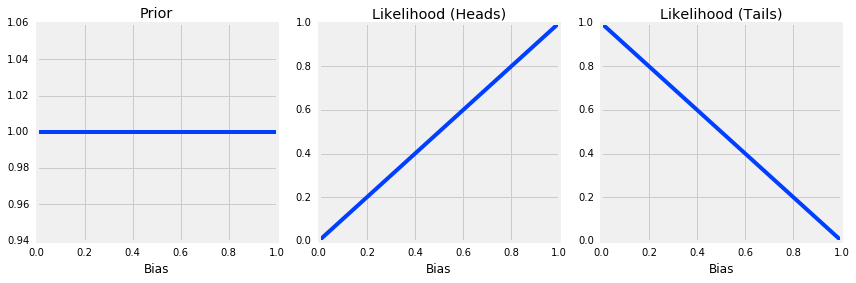

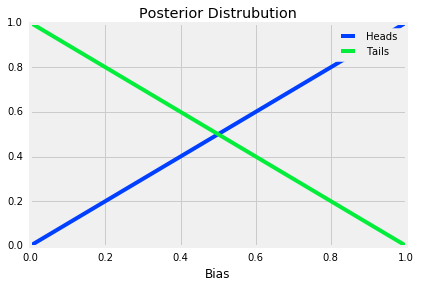

In [395]:
b = np.linspace(0,1,100) #list of biases/hypothesis
pi = myprior(x) #the prior on my biases. Prior is often denoted pi

#Plotting the prior p(H|I)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(b,pi)
plt.title('Prior')
plt.xlabel('Bias')

#Plot likelihood of getting heads for each hypothesis
plt.subplot(132)
plt.plot(x,likeli('h',b))
plt.title('Likelihood (Heads)')
plt.xlabel('Bias')

#Plot likelihood of getting tails for each hypothesis
plt.subplot(133)
plt.plot(x,likeli('t',b))
plt.title('Likelihood (Tails)')
plt.xlabel('Bias')
plt.tight_layout()

#Plot the posterior distribution p(H|I) p(D|H,I)
plt.figure()
plt.subplot(111)
plt.plot(x,likeli('h',b)*pi)
plt.plot(x,likeli('t',b)*pi)
plt.title('Posterior Distrubution')
plt.xlabel('Bias')
plt.legend(['Heads','Tails'])




### The likelihood of your data

Given a number of data points, the likelihood for your data is 

$$ L = \Pi_i^N L_i $$

In [352]:
def data_likeli(D,b):
    L = np.product([likeli(d,b) for d in D])
    return L

def data_likeli_func(k,n,b):
    '''
    k = number of heads
    n = number of trials
    '''
    return (b**k) * (1-b)**(n-k)

#### Likelihoods

I show the likelihood for a random distribution of tosses with a bias of 0.25. 
The likelihood peaks around the correct answer

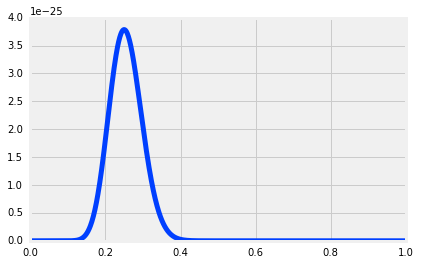

In [394]:
data = np.random.choice([1,0],100,p=[0.25,0.75])
k = float(data.tolist().count(1))
n = float(len(data))

b = np.linspace(0,1,1000)
L = []
for i in b:
    L.append(data_likeli(data,i))

plt.plot(b,L*myprior(b),'-',lw=5)

### Why data matters

As you can see in the plots below, having more data refines our posterior probability on the bias. 

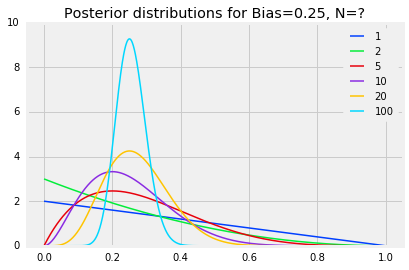

In [433]:
%matplotlib inline
b = np.linspace(0,1,1000)
for n in [1,2,5,10,20,100]:
    k = n/4
    L=[]
    for i in b:
        L.append(data_likeli_func(k,n,i))
    
    plt.plot(b,L*myprior(b)/(np.sum(L)*np.diff(b)[0]),lw=1.5)

plt.legend([1,2,5,10,20,100])
#plt.ylim(-0.05,1.05)
plt.xlim(-0.05,1.05)
plt.title('Posterior distributions for Bias=0.25, N=?')
None